In [1]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.5.3


In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
X_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_train.csv', encoding = 'unicode_escape')
X_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_test.csv', encoding = 'unicode_escape')

y_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_train.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)
y_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_test.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)

BMI: 18 a 30 = 1; resto = 0

MentalHealth y PhysicalHealth: 0 a 10 = 1; resto = 0

SleepTime: 5 a 12 = 1; resto = 0

In [5]:
X_train['BMI'] = X_train['BMI'].map(lambda x: 1 if (x >= 18 and x<=30) else 0)
X_train['SleepTime'] = X_train['SleepTime'].map(lambda x: 1 if (x >= 5 and x<= 12) else 0)
X_train['PhysicalHealth'] = X_train['PhysicalHealth'].map(lambda x: 1 if x<=10 else 0)
X_train['MentalHealth'] = X_train['MentalHealth'].map(lambda x: 1 if x<=10 else 0)

X_test['BMI'] = X_test['BMI'].map(lambda x: 1 if (x >= 18 and x<=30) else 0)
X_test['SleepTime'] = X_test['SleepTime'].map(lambda x: 1 if (x >= 5 and x<= 12) else 0)
X_test['PhysicalHealth'] = X_test['PhysicalHealth'].map(lambda x: 1 if x<=10 else 0)
X_test['MentalHealth'] = X_test['MentalHealth'].map(lambda x: 1 if x<=10 else 0)

In [6]:
len(X_train), len(X_test)

(38312, 16422)

In [7]:
import xgboost as xgb

In [8]:
xgb_clf = xgb.XGBClassifier()

In [9]:
xgb_clf.load_model('/home/pedro/TpIAFiuba/Modelos/XGBoost_Model_binario.json')

In [10]:
xgb_clf

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              feature_types=['int', 'int', 'int', 'int', 'int', 'int', 'int',
                             'int', 'int', 'int', 'int', 'int', 'int', 'int',
                             'int', 'int', 'int', 'int', 'int', 'int', 'int',
                             'int',...
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [11]:
from joblib import load

In [12]:
rf_clf = load('/home/pedro/TpIAFiuba/Modelos/RF_Model_binario.joblib')

In [13]:
lgbm_clf = load('/home/pedro/TpIAFiuba/Modelos/LGBM_Model_binario.joblib')

In [14]:
rf_clf

RandomForestClassifier(min_samples_leaf=2, random_state=10)

In [15]:
lgbm_clf

LGBMClassifier(max_depth=10, random_state=10)

In [16]:
from sklearn.ensemble import VotingClassifier

In [17]:
voting_clf = VotingClassifier(estimators=[('lgbm_clf', lgbm_clf), ('rf_clf', rf_clf), ('xgb_clf', xgb_clf)], voting='soft')

In [18]:
voting_clf

VotingClassifier(estimators=[('lgbm_clf',
                              LGBMClassifier(max_depth=10, random_state=10)),
                             ('rf_clf',
                              RandomForestClassifier(min_samples_leaf=2,
                                                     random_state=10)),
                             ('xgb_clf',
                              XGBClassifier(alpha=10, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=Fa...
                                            gamma=None, gpu_id=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, ...))],
                 voting='soft')

In [19]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lgbm_clf',
                              LGBMClassifier(max_depth=10, random_state=10)),
                             ('rf_clf',
                              RandomForestClassifier(min_samples_leaf=2,
                                                     random_state=10)),
                             ('xgb_clf',
                              XGBClassifier(alpha=10, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=Fa...
                                            gamma=None, gpu_id=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, ...))],
                 voting='soft')

In [20]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [21]:
preds = voting_clf.predict(X_test)

In [22]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      8211
           1       0.75      0.80      0.77      8211

    accuracy                           0.76     16422
   macro avg       0.77      0.76      0.76     16422
weighted avg       0.77      0.76      0.76     16422



In [23]:
recall_score(y_test, preds)

0.7974668128120813

In [24]:
accuracy_score(y_test, preds)

0.7642187309706491

In [25]:
cm = confusion_matrix(y_test, preds)

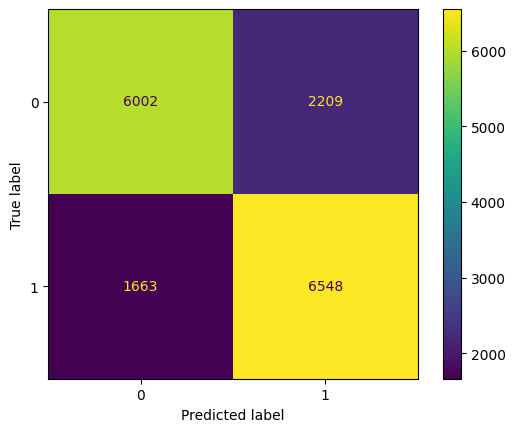

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot()